# CUSTOMER CHURN IN A TELECOMMUNICATIONS COMPANY

## USE CASE

In this project, we will create a model to predict customer churning (leaving) of a telecommunications company based on the data set containing details like customer demographics, their behaviour, and whether they end up churning. 

### Importing the Necessary Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## DATA SET

### Data Description
The data set down loaded from watson analytics and can be dwonloaded from the belo link.  
[Down load data]("https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv")



Dataset on customer demographics, their behaviour, and whether or not they end up churning (leaving). This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs. A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

* The data set on customer churn includes information about:

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for phone, multiple lines, internet, online security, online backup, - device      protection, tech support, and streaming TV and movies

* Customer account information- How long they’ve been a customer (tenure), contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers - gender, age range, and if they have partners and dependents



### Creating a Pandas DataFrame from a CSV file

In [2]:
data = pd.read_csv("custchurn.csv")

## DATA WRANGLING

In [3]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7881-INRLC,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Cleaning

Categorize columns 'MonthlyCharges' and 'TotalCharges'

In [9]:
data["MonthlyCharges_cat"] = (data['MonthlyCharges'] > np.mean(data['MonthlyCharges'])) *1


'TotalCharges' is object data type. So we have to convert to numeric data type and then categorize. Also some rows containing missing values as ' '  character. So we need to replace these rows with 'nan' and then fill  with '0'.

In [10]:
data["TotalCharges"][488]

' '

In [11]:
data_clean = data.replace(' ', np.nan)

In [12]:
data_clean["TotalCharges"][488]

nan

In [13]:
data_clean.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
MonthlyCharges_cat     0
dtype: int64

In [14]:
data_clean_1 = data_clean.fillna(0)

In [15]:
data_clean_1["TotalCharges_num"] = data_clean_1["TotalCharges"].astype(np.float64)


In [16]:
data_clean_1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_cat,TotalCharges_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,108.15


In [17]:
data_clean_1["TotalCharges_cat"] = (data_clean_1['TotalCharges_num'] > np.mean(data_clean_1['TotalCharges_num'])) *1

In [18]:
data_clean_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_cat,TotalCharges_num,TotalCharges_cat
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,0,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,108.15,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,151.65,0


In [19]:
data_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
customerID            7043 non-null object
gender                7043 non-null object
SeniorCitizen         7043 non-null int64
Partner               7043 non-null object
Dependents            7043 non-null object
tenure                7043 non-null int64
PhoneService          7043 non-null object
MultipleLines         7043 non-null object
InternetService       7043 non-null object
OnlineSecurity        7043 non-null object
OnlineBackup          7043 non-null object
DeviceProtection      7043 non-null object
TechSupport           7043 non-null object
StreamingTV           7043 non-null object
StreamingMovies       7043 non-null object
Contract              7043 non-null object
PaperlessBilling      7043 non-null object
PaymentMethod         7043 non-null object
MonthlyCharges        7043 non-null float64
TotalCharges          7043 non-null object
Churn                 7043 non-nul

## EXPLORATORY DATA ANALYSIS

We will drop columns like "customerID", "MonthlyCharges", "TotalCharges", "TotalCharges_num" as it not required for analysis and modeling.

In [20]:
df = data_clean_1.drop(["customerID", "MonthlyCharges", "TotalCharges", "TotalCharges_num"], axis=1)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges_cat,TotalCharges_cat
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,0


### Chi-square Test of Independence using scipy.stats.chi2_contingency

We will check the relation ship of depndent variabel "Churn" against all other independent variables in the data set


The first value  is the Chi-square value, followed by the p-value , then comes the degrees of freedom, and lastly it outputs the expected frequencies as an array. if all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05. 

In [21]:
import scipy.stats as stats
from scipy.stats import chi2_contingency


In [22]:
chi2_contingency(pd.crosstab(df['Churn'], df['gender']))

(0.48408288220913831,
 0.48657873605618596,
 1,
 array([[ 2562.38989067,  2611.61010933],
        [  925.61010933,   943.38989067]]))

In [23]:
chi2_contingency(pd.crosstab(df['Churn'], df['SeniorCitizen']))

(159.42630036838742,
 1.5100668050923778e-36,
 1,
 array([[ 4335.05239245,   838.94760755],
        [ 1565.94760755,   303.05239245]]))

In [24]:
chi2_contingency(pd.crosstab(df['Churn'], df['Partner']))

(158.7333820309922,
 2.1399113440759935e-36,
 1,
 array([[ 2674.78830044,  2499.21169956],
        [  966.21169956,   902.78830044]]))

In [25]:
chi2_contingency(pd.crosstab(df['Churn'], df['Dependents']))

(189.12924940423474,
 4.9249216612154196e-43,
 1,
 array([[ 3623.93042737,  1550.06957263],
        [ 1309.06957263,   559.93042737]]))

In [26]:
chi2_contingency(pd.crosstab(df['Churn'], df['tenure']))

(1065.3308567510544,
 1.2807811055496877e-176,
 72,
 array([[   8.08093142,  450.3282692 ,  174.84197075,  146.92602584,
          129.29490274,   97.70580718,   80.80931421,   96.23654693,
           90.35950589,   87.42098538,   85.21709499,   72.72838279,
           85.95172512,   80.07468408,   55.83188982,   72.72838279,
           58.77041034,   63.91282124,   71.25912253,   53.62799943,
           52.15873917,   46.28169814,   66.11671163,   62.44356098,
           69.05523215,   58.03578021,   58.03578021,   52.8933693 ,
           41.87391736,   52.8933693 ,   52.8933693 ,   47.7509584 ,
           50.68947892,   47.01632827,   47.7509584 ,   64.64745137,
           36.73150646,   47.7509584 ,   43.34317762,   41.13928724,
           47.01632827,   51.42410904,   47.7509584 ,   47.7509584 ,
           37.46613659,   44.81243788,   54.36262956,   49.95484879,
           47.01632827,   48.48558853,   49.95484879,   49.95484879,
           58.77041034,   51.42410904,   49.9548487

In [27]:
chi2_contingency(pd.crosstab(df['Churn'], df['PhoneService']))

(0.91503298925469478,
 0.33878253580669282,
 1,
 array([[  501.01774812,  4672.98225188],
        [  180.98225188,  1688.01774812]]))

In [28]:
chi2_contingency(pd.crosstab(df['Churn'], df['MultipleLines']))

(11.330441483197561,
 0.0034643829548772999,
 2,
 array([[ 2490.39613801,   501.01774812,  2182.58611387],
        [  899.60386199,   180.98225188,   788.41388613]]))

In [29]:
chi2_contingency(pd.crosstab(df['Churn'], df['InternetService']))

(732.30958966779394,
 9.5717882228405444e-160,
 2,
 array([[ 1778.53954281,  2274.41488002,  1121.04557717],
        [  642.46045719,   821.58511998,   404.95442283]]))

In [30]:
chi2_contingency(pd.crosstab(df['Churn'], df['OnlineSecurity']))

(849.99896796159624,
 2.6611496351768565e-185,
 2,
 array([[ 2569.73619196,  1121.04557717,  1483.21823087],
        [  928.26380804,   404.95442283,   535.78176913]]))

In [31]:
chi2_contingency(pd.crosstab(df['Churn'], df['OnlineBackup']))

(601.81279011340894,
 2.0797592160865457e-131,
 2,
 array([[ 2268.53783899,  1121.04557717,  1784.41658384],
        [  819.46216101,   404.95442283,   644.58341616]]))

In [32]:
chi2_contingency(pd.crosstab(df['Churn'], df['DeviceProtection']))

(558.41936940738901,
 5.5052194964572442e-122,
 2,
 array([[ 2273.68024989,  1121.04557717,  1779.27417294],
        [  821.31975011,   404.95442283,   642.72582706]]))

In [33]:
chi2_contingency(pd.crosstab(df['Churn'], df['TechSupport']))

(828.1970684587393,
 1.4430840279999813e-180,
 2,
 array([[ 2551.37043873,  1121.04557717,  1501.5839841 ],
        [  921.62956127,   404.95442283,   542.4160159 ]]))

In [34]:
chi2_contingency(pd.crosstab(df['Churn'], df['StreamingTV']))

(374.20394331098134,
 5.5289944857390243e-82,
 2,
 array([[ 2064.31066307,  1121.04557717,  1988.64375976],
        [  745.68933693,   404.95442283,   718.35624024]]))

In [35]:
chi2_contingency(pd.crosstab(df['Churn'], df['StreamingMovies']))

(375.6614793452656,
 2.667756755723681e-82,
 2,
 array([[ 2045.94490984,  1121.04557717,  2007.00951299],
        [  739.05509016,   404.95442283,   724.99048701]]))

In [36]:
chi2_contingency(pd.crosstab(df['Churn'], df['Contract']))

(1184.5965720837926,
 5.8630383006733913e-258,
 2,
 array([[ 2846.69175067,  1082.11018032,  1245.198069  ],
        [ 1028.30824933,   390.88981968,   449.801931  ]]))

In [37]:
chi2_contingency(pd.crosstab(df['Churn'], df['PaperlessBilling']))

(258.27764906707307,
 4.073354668665985e-58,
 1,
 array([[ 2109.85773108,  3064.14226892],
        [  762.14226892,  1106.85773108]]))

In [38]:
chi2_contingency(pd.crosstab(df['Churn'], df['PaymentMethod']))

(648.1423274814,
 3.6823546520097993e-140,
 3,
 array([[ 1134.26891949,  1118.10705665,  1737.40025557,  1184.22376828],
        [  409.73108051,   403.89294335,   627.59974443,   427.77623172]]))

In [39]:
chi2_contingency(pd.crosstab(df['Churn'], df['MonthlyCharges_cat']))

(290.00939087388133,
 4.9489165284232308e-65,
 1,
 array([[ 2292.04600312,  2881.95399688],
        [  827.95399688,  1041.04600312]]))

In [40]:
chi2_contingency(pd.crosstab(df['Churn'], df['TotalCharges_cat']))

(159.18300455341796,
 1.7066905050999039e-36,
 1,
 array([[ 3227.96478773,  1946.03521227],
        [ 1166.03521227,   702.96478773]]))

**Based on the chi-square test performed on the above features against the churn feature, we drop "gender" feature from the features selected for model. Because the as the p-value is higher than 0.05. So the null hypothesis is valid and there is no relationship for customer churning on customer "gender".**

In [41]:
final_df = df.drop(["gender", ], axis=1)

In [42]:
final_df.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges_cat,TotalCharges_cat
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,0


## MODELING

### Select Target Variable

In [43]:
target = final_df.Churn
target.head(3)

0     No
1     No
2    Yes
Name: Churn, dtype: object

### Encode target variabel for modeling

In [44]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()
target_enc = le.fit_transform(target)

In [45]:
target_enc

array([0, 0, 1, ..., 0, 1, 0])

**Here the 'NO' observations encoded as '0' and 'YES' observations encoded as '1'.** 

### Select Feature Variables

In [46]:
features = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                              'MonthlyCharges_cat', 'TotalCharges_cat']]
features.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_cat,TotalCharges_cat
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0,0


### Encode features for modeling

Here we are using pandas function "get_dummies" for encoding the complete fetures. This is very handy compared to doing it by manually using label encoder and one hot encoder.

In [47]:
# Get dummies
X = pd.get_dummies(features, prefix_sep='_', drop_first=True)

# X head
X.head()

,SeniorCitizen,tenure,MonthlyCharges_cat,TotalCharges_cat,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
SeniorCitizen                            7043 non-null int64
tenure                                   7043 non-null int64
MonthlyCharges_cat                       7043 non-null int64
TotalCharges_cat                         7043 non-null int64
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service         7043 non-null uint8
OnlineBackup_Yes                       

## SPLIT DATA SET FOR TRAING

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, target_enc, test_size=0.2, random_state=0)


## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_1 = rf.fit(X_train, y_train)

prediction_rf = model_1.predict(X_test)
print(accuracy_score(y_test, prediction_rf))

0.755855216466


/home/shahir/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Model Evaluation

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,make_scorer
#import scikitplotasskplt
print("classification report for Logistic Regression Model...")
print(classification_report(y_test, prediction_rf))
tn,fp,fn,tp = confusion_matrix(y_test, prediction_rf).ravel()

classification report for Logistic Regression Model...
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1041
           1       0.54      0.45      0.49       368

   micro avg       0.76      0.76      0.76      1409
   macro avg       0.68      0.66      0.66      1409
weighted avg       0.74      0.76      0.75      1409



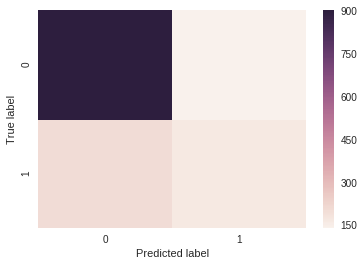

In [59]:
sns.heatmap(confusion_matrix(y_test, prediction_rf))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Logitsic Regression Classifier

In [60]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
model_2 = lr.fit(X_train, y_train)

prediction_lr = model_2.predict(X_test)
print(accuracy_score(y_test, prediction_lr))


0.789921930447


/home/shahir/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model Evaluation

In [61]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,make_scorer
#import scikitplotasskplt
print("classification report for Logistic Regression Model...")
print(classification_report(y_test, prediction_lr))
tn,fp,fn,tp = confusion_matrix(y_test, prediction_lr).ravel()

classification report for Logistic Regression Model...
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.62      0.52      0.56       368

   micro avg       0.79      0.79      0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



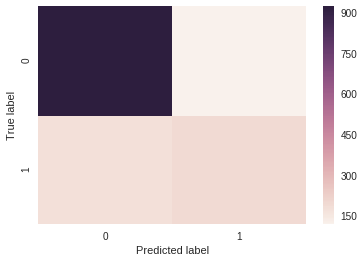

In [62]:
sns.heatmap(confusion_matrix(y_test, prediction_lr))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## EVALUATION

**We used two algorithm to compare their accuracy. We got "76%" accuracy for RandomForest algorithm and '79%' accuracy for LogisticRegression algorithm.**

This score is without any para meter turning. So further exploration is reccomended to achieve higher accuracy.